In [13]:
import nmresearch as nmr
import rustworkx as rx
from rustworkx.visualization import mpl_draw
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sc_gen = nmr.GridGraph()

In [ ]:
G = sc_gen.load_graph((5, 5), 1)

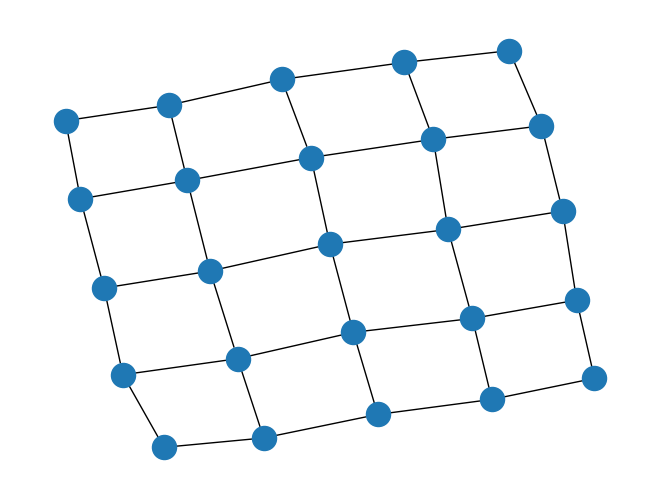

In [4]:
mpl_draw(G)

In [ ]:
G2 = sc_gen.load_graph((5, 5), 1)

In [8]:
sc_calc = nmr.ClassicalGraph(sc_gen)

In [ ]:
sc_calc.avg_cluster_size(0.4, (50, 50), 1)

np.float64(20.7426154836159)

In [ ]:
Lvals = [100, 250, 500, 750, 1000]
pvals = np.arange(0.4, 0.6, 0.01)

reps = 100
density = {}
strength = {}
for L in Lvals:
    start = time.time()
    density[L] = [
        sc_calc.avg_cluster_size(p, (L, L), 1, repititions=reps) for p in pvals
    ]
    strength[L] = [
        sc_calc.percolation_strength(p, (L, L), 1, repititions=reps) for p in pvals
    ]
    end = time.time()
    print(
        f"Avg Computation time per fcc graph for L={L} is {(end-start)/(reps*len(pvals))} s"
    )

Avg Computation time per fcc graph for L=100 is 0.025852145075798035 s
Avg Computation time per fcc graph for L=250 is 0.17048227262496948 s
Avg Computation time per fcc graph for L=500 is 0.6937278262376785 s
Avg Computation time per fcc graph for L=750 is 1.563509511232376 s
Avg Computation time per fcc graph for L=1000 is 2.86270187497139 s


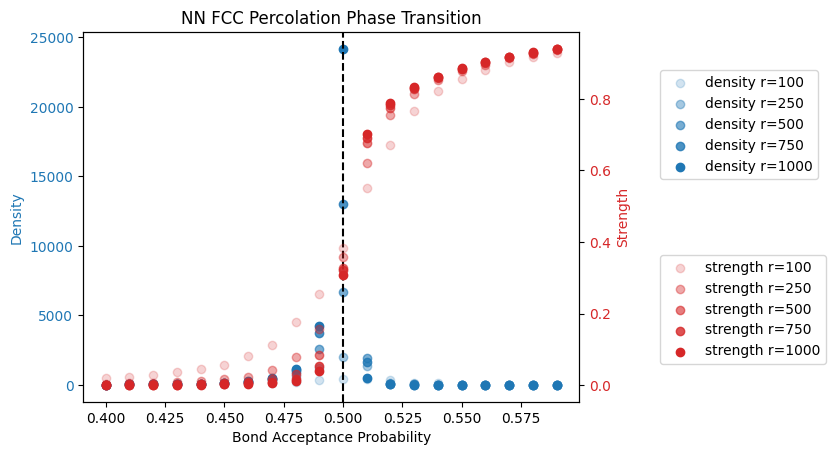

In [ ]:
fig, ax1 = plt.subplots()
max_density_pval = 0
max_density = 0
color = "tab:blue"
ax1.set_xlabel("Bond Acceptance Probability")
ax1.set_ylabel("Density", color=color)
for idx, r in enumerate(Lvals):
    ax1.scatter(
        pvals,
        density[r],
        label=f"density r={r}",
        color=color,
        alpha=(idx + 1) / len(Lvals),
    )
    ax1.tick_params(axis="y", labelcolor=color)
    if max_density < np.max(density[r]):
        max_density_pval = pvals[np.argmax(density[r])]
        max_density = np.max(density[r])


ax1.axvline(x=max_density_pval, color="black", linestyle="--")
plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.75))


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:red"
ax2.set_ylabel("Strength", color=color)  # we already handled the x-label with ax1
for idx, r in enumerate(Lvals):
    ax2.scatter(
        pvals,
        strength[r],
        label=f"strength r={r}",
        color=color,
        alpha=(idx + 1) / len(Lvals),
    )
    ax2.tick_params(axis="y", labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("NN FCC Percolation Phase Transition")
plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.25))
plt.show()